<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [2]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Original Image Shape: (100, 100, 3)
img_single_channel Shape: (100, 100)


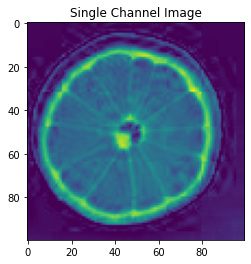

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Print the shape of the image
print("Original Image Shape:", image.shape)

#Create a new variable called img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:, :, -1]

#Print the shape of img_single_channel to check that it has the same number of pixels as the original image
print("img_single_channel Shape:", img_single_channel.shape)

#Use plt.imshow to plot img_single_channel
plt.imshow(img_single_channel)  
plt.title("Single Channel Image")
plt.show()


## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

img_average_channel Shape: (100, 100)


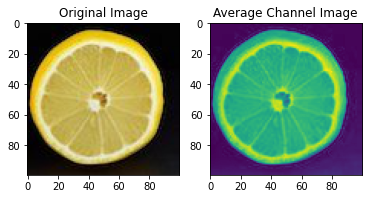

In [4]:
#Create a new variable called img_average_channel that is equivalent to the average of all three color channels of image
img_average_channel = np.mean(image, axis=2)
#Print the shape of img_average_channel to check that it has the same number of pixels as the original image
print("img_average_channel Shape:", img_average_channel.shape)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)
plt.title("Average Channel Image")
plt.show()


## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
  

2. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.

3. Print a random row out of `identity_matrix` and describe your observations.

  **Ans:The diagonal integers in an identity matrix are all 1, and the other numbers in the matrix are all 0. The same regular matrix is returned when any regular matrix is multiplied by this special matrix. It works something like multiplying any number by 1; the result is always the same.** 


In [5]:

#Create an identity matrix called identity_matrix that has the same size as img_average_channel.
img_shape = img_average_channel.shape
identity_matrix = np.eye(img_shape[0], img_shape[1])

#Print a random row out of identity_matrix and describe your observations.
random_row_idx = np.random.randint(0, img_shape[0])
random_row = identity_matrix[random_row_idx, :]

print("Random Row from Identity Matrix:")
print(random_row)


Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**Observations: This random row which we printed has 1 at one position (the diagonal) and 0s elsewhere,following the definition of an identity matrix.**


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [6]:
#First, create a numpy array that contains the numbers  0,1,⋯,𝑁 where  𝑁 is the number of rows in the image.
num_rows = img_average_channel.shape[0]

rows = np.arange(num_rows)

#Use numpy.random.shuffle to shuffle the indices. Call the shuffled array, rows
np.random.shuffle(rows)

#Print rows and inspect the elements.

print("Shuffled Rows:")
print(rows)


Shuffled Rows:
[77 36 16 23 21  4 92 40 51 35 12 96  2 15  7 91 13 89 44 37 27 18 67 95
 41 70 25 68 76 94 55 64 83  6 24 93 59 69  8 62 75 88 61 20 97 52 11 58
 82 84  1 98 43 29 30 49 10 72 32 99 79 73 56  3 42 78 26 31 90 86 57 17
  0 46 22 60 80 65 34 47 54 38 39 19 87 81  5 28 71 45  9 53 63 33 48 66
 14 50 74 85]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [7]:
# Use your array of random row indices to create a new matrix T from identity_matrix. Overall, T has the same elements as identity_matrix, but the order of the rows of T should be according to the variable rows
T = identity_matrix[rows]


print("Shape of T:", T.shape)

# If needed, reshape T to match the size of img_average_channel
if T.shape != img_average_channel.shape:
    T = T[:img_average_channel.shape[0], :img_average_channel.shape[1]]

# Reprint the shape of T after potential reshaping
print("Shape of T after sanity check:", T.shape)


Shape of T: (100, 100)
Shape of T after sanity check: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


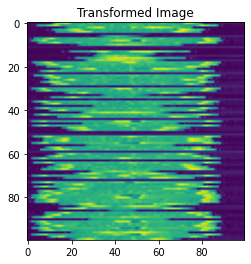

In [8]:
# Matrix multiplication between T and img_average_channel
transformed_image = T @ img_average_channel

# Check the shape of the result
print("Shape of transformed_image:", transformed_image.shape)

# Plot the transformed_image
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()


**Depending on how the rows were shuffled, a pattern can be seen in the modified image. The resulting pattern is probably a combination of many elements from the original image, but in a new arrangement, because the rows were randomly shuffled. In other words, the transformation essentially "scrambles" the original image's rows, creating a visual difference between the two.**

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

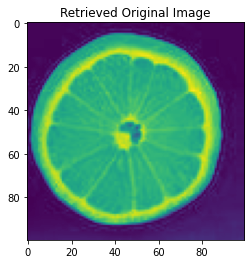

In [9]:
import numpy as np

#How would you show that it is invertible?

#Ans: To determine if matrix T is invertible, we can check its determinant. If the determinant is non-zero, then the matrix is invertible.


# Check if matrix T is invertible (has a non-zero determinant)
if np.linalg.det(T) != 0:
    # If T is invertible, compute its inverse
    Tinv = np.linalg.inv(T)

    # Perform the inverse of the scrambling operation to retrieve the original image
    retrieved_image = Tinv @ transformed_image

    # Plot the retrieved_image
    plt.imshow(retrieved_image)
    plt.title("Retrieved Original Image")
    plt.show()
else:
    print("Matrix T is not invertible.")


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

Original Image Shape: (100, 100, 3)
Shape of scrambled_image: (100, 100, 3)


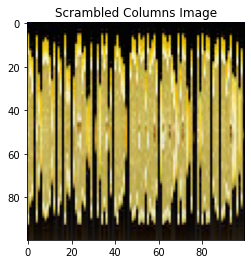

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# You can print the shape of the original image as follows:
print("Original Image Shape:", image.shape)

# Get the number of columns in the original image
num_columns = image.shape[1]

# Create an array of column indices from 0 to num_columns-1
columns = np.arange(num_columns)

# Shuffle the column indices
np.random.shuffle(columns)

# Shuffle the columns of the original image using fancy indexing
scrambled_image = image[:, columns, :]

# Check the shape of the scrambled image
print("Shape of scrambled_image:", scrambled_image.shape)

# Plot the scrambled image for proof of concept
plt.imshow(scrambled_image.astype(np.uint8))
plt.title("Scrambled Columns Image")
plt.show()


Original Image Shape: (100, 100, 3)
Shape of scrambled_image: (100, 100, 3)


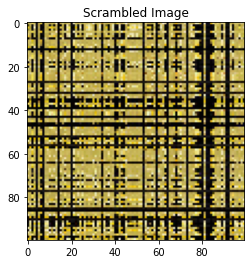

Shape of recovered_image: (100, 100, 3)


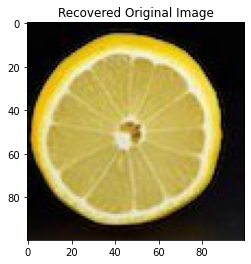

In [12]:
import numpy as np
import matplotlib.pyplot as plt



print("Original Image Shape:", image.shape)

# Get the dimensions of the original image
num_rows, num_columns, num_channels = image.shape

# Create arrays of row and column indices and shuffle them
rows = np.arange(num_rows)
columns = np.arange(num_columns)

np.random.shuffle(rows)
np.random.shuffle(columns)

# Shuffle the columns and rows of the original image using fancy indexing
scrambled_image = image[rows][:, columns]

# Check the shape of the scrambled image
print("Shape of scrambled_image:", scrambled_image.shape)

# Plot the scrambled image
plt.imshow(scrambled_image.astype(np.uint8))
plt.title("Scrambled Image")
plt.show()

# Invert the operations to recover the original image
# Create inverse arrays for rows and columns
inverse_rows = np.argsort(rows)
inverse_columns = np.argsort(columns)

# Unscramble the scrambled image using inverse arrays and fancy indexing
recovered_image = scrambled_image[inverse_rows][:, inverse_columns]

# Check the shape of the recovered image
print("Shape of recovered_image:", recovered_image.shape)

# Plot the recovered original image
plt.imshow(recovered_image.astype(np.uint8))
plt.title("Recovered Original Image")
plt.show()
